
# Exploring Ebay Car Sales Data


## The EBay Kleinanzeigen (Translation: "Classifieds")

Most people have heard eBay https://www.ebay.com/; the online e-commerce behemoth where users buy and sell goods and services 'auction style.'  According to Wikipedia https://en.wikipedia.org/wiki/EBay, eBay is a "multibillion-dollar business with operations in about 32 countries, as of 2019." Germany is is one of those countries. eBay Kleinanzeigen is Deutschlands version of ebay classifieds https://www.ebay-kleinanzeigen.de/.

### Project Purpose 
This project is for the completion of the DataQuest.io https://www.dataquest.io/ "Pandas and NumPy Fundamentals" module; the third in a series for completing the Data Science course path. New found knowledge will be used to better understand the data and answer several questions. The following topics were introduced in this module: 

- Using Pandas to do the following:
    - Explore data
    - Clean column names
    - Deal with incorrect values
    - Aggregate data


### Relationships Between Brands, Models, Conditions and Prices
Once the data has been cleaned and wrangled, analysis will be used to understand the relationships between brands, models, conditions and prices. The following questions will be explored:

- What outliers exist for the registration year and is it acceptable to remove them?
- Is there a relationship between mileage and price; if so, what is it?
- What are the top 6 brands by count and what are the average price and mileage for each?
- What are the most common brand/model combinations? 
- How much cheaper are cars with damage than their undamaged counter parts?

### Summary of the Results 
97% of the rows remained after cleaning the data. The 3% that were justifiably removed consisted of outliers and unrealistic dates in the registration year. The vast majority of cars on the market were heavily used and inexpensive. As expected,the data showed a strong, negative, linear correlation between odometer and price. The Mercedes and BMW were both pretty similar in price and mileage(as were the Ford and Opel, with the Volkswagen was in the middle). The Volkswagen 'Golf' was the most commonly found brand/model followed by Peugeot 'Andere', and the BMW '3er'. Finally, almost 12% of cars had some sort of damage, resulting in an average decrease in value of 49.03% across all models.

Please refer to the full analysis below for details. 

## Data Source and Definitions
Source: The dataset originated from eBay Kleinanzeigen, a classifieds section of the German eBay website. It was then scraped and uploaded to Kaggle by user orgesleka (link to which is no longer available). However, it can find it here: https://data.world/data-society/used-cars-data.  

Dataquest.io made a few modifications to the dataset for educational purposes, and sampled 50,000 data points from the original for smoother, faster processing in their host environment. They also 'dirtied' the dataset a bit more to resemble what one would expect from a scraped dataset (the version uploaded to Kaggle was cleaned to be easier to work with). Descriptions of the columns are as follows: 


|Column Name|Explanation|
| :-------: | :---: |
|dateCrawled|When this ad was first crawled. All field-values are taken from this date.|
|name                 |Name of the car.|
|seller               |Whether the seller is private or a dealer.|
|offerType            |The type of listing|
|price                |The price on the ad to sell the car in US dollars.|
|abtest               |Whether the listing is included in an A/B test.|
|vehicleType          |The vehicle Type.|
|yearOfRegistration   |The year in which the car was first registered.|
|gearbox              |The transmission type.|
|powerPS              |The power of the car in PS.|
|model                |The car model name.|
|odometer             |How many kilometers the car has driven.|
|monthOfRegistration  |The month in which the car was first registered.|
|fuelType             |What type of fuel the car uses.|
|brand                |The brand of the car.|
|notRepairedDamage    |If the car has a damage which is not yet repaired.|
|dateCreated          |The date on which the eBay listing was created.|
|nrOfPictures         |The number of pictures in the ad.| 
|postalCode           |The postal code for the location of the vehicle.|
|lastSeen             |When the crawler saw this ad last online.|



## Getting Familiar with the Data

In [688]:
# Import python libraries and read in the file
import numpy as np
import pandas as pd
import datetime as dt
%matplotlib inline
autos = pd.read_csv('autos.csv', encoding = 'Latin-1')

In [689]:
autos.shape
print('There are {} rows and {} columns in the inital dataset'.format(autos.shape[0], autos.shape[1]))

There are 50000 rows and 20 columns in the inital dataset


In [690]:
# Display the first five rows of data in pandas tabular format
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [691]:
# Observe the null values for the columns
autos.isnull().sum()

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5095
yearOfRegistration        0
gearbox                2680
powerPS                   0
model                  2758
odometer                  0
monthOfRegistration       0
fuelType               4482
brand                     0
notRepairedDamage      9829
dateCreated               0
nrOfPictures              0
postalCode                0
lastSeen                  0
dtype: int64

In [692]:
# Observe the data types
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

## Cleaning and Wrangling the Data
There were 50000 rows and 20 columns in the initial dataset. From those, two columns were dropped due to redundancy. Many columns contained null values. These values were handled as necessary as the analysis progressed. There are outliers in the 'registration_year' column, which are addressed in the next section.  A lot of wrangling was required for format consistency. The following is a list of tasks that were performed:

1. 'Seller' and 'Offer Type' have the same values through-out the columns, so they will be dropped. 
2.  Format all column titles to 'snakecase' for consistency. 
3. Remove non-numeric characters in price and odometer_km column and change the data type to integers. This will make numeric aggregation possible. 
4. For this analysis, there's no need to be concerned with time values; just dates. Therefore, remove the time values from 'date_crawled','last_seen','ad_created', and leave the dates.  
5. Translate all columns and individual strings from German to English.

In [693]:
# Task #1: Drop'Seller' and 'Offer Type'
autos = autos.drop(columns=['seller','offerType'])
autos

,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,"$24,900",control,limousine,2011,automatik,239,q5,"100,000km",1,diesel,audi,nein,2016-03-27 00:00:00,0,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,"$1,980",control,cabrio,1996,manuell,75,astra,"150,000km",5,benzin,opel,nein,2016-03-28 00:00:00,0,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,"$13,200",test,cabrio,2014,automatik,69,500,"5,000km",11,benzin,fiat,nein,2016-04-02 00:00:00,0,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,"$22,900",control,kombi,2013,manuell,150,a3,"40,000km",11,diesel,audi,nein,2016-03-08 00:00:00,0,35683,2016-04-05 16:45:07


In [694]:
# Task #2: Convert the columns to snakecase
autos.rename(columns = {'yearOfRegistration':'registration_year', 'abtest':'test',
                        'monthOfRegistration': 'registration_month', 
                        'notRepairedDamage': 'unrepaired_damage', 
                        'dateCreated':'ad_created' }, inplace = True)

autos.rename(columns = {'dateCrawled':'date_crawled' ,
                        'offerType': 'offer_type', 'vehicleType':'vehicle_type' , 
                        'powerPS': 'power_ps','odometer':'odometer_km','fuelType':'fuel_type', 'nrOfPictures':'nr_of_pictures' , 
                        'postalCode': 'postal_code', 'lastSeen': 'last_seen'}, inplace = True)

In [695]:
# Columns after snakecase conversion
autos.columns

Index(['date_crawled', 'name', 'price', 'test', 'vehicle_type',
       'registration_year', 'gearbox', 'power_ps', 'model', 'odometer_km',
       'registration_month', 'fuel_type', 'brand', 'unrepaired_damage',
       'ad_created', 'nr_of_pictures', 'postal_code', 'last_seen'],
      dtype='object')

In [696]:
# Task #3a: Remove non-numeric characters in the price column and convert them to integers:
autos['price'] = autos['price'].str.replace('$', '')
autos['price'] = autos['price'].str.replace(',', '')
autos['price'] = autos['price'].astype(int)
autos['price'].unique()

array([ 5000,  8500,  8990, ...,   385, 22200, 16995])

In [697]:
# Task #3b: Remove non-numeric characters from the odometer column and convert them to integers:
autos['odometer_km'] = autos['odometer_km'].str.replace('km', '')
autos['odometer_km'] = autos['odometer_km'].str.replace(',', '')
autos['odometer_km'] = autos['odometer_km'].astype(int)
autos['odometer_km'].unique()

array([150000,  70000,  50000,  80000,  10000,  30000, 125000,  90000,
        20000,  60000,   5000, 100000,  40000])

In [698]:
# Task #4: Remove the time values from 'date_crawled','last_seen','ad_created' columns. 
autos[['date_crawled','last_seen','ad_created']]
autos[['date_crawled','last_seen','ad_created']] = autos[['date_crawled','last_seen','ad_created']].apply(lambda x : x.str[:10])
autos[['date_crawled','last_seen','ad_created']]

,date_crawled,last_seen,ad_created
0,2016-03-26,2016-04-06,2016-03-26
1,2016-04-04,2016-04-06,2016-04-04
2,2016-03-26,2016-04-06,2016-03-26
3,2016-03-12,2016-03-15,2016-03-12
4,2016-04-01,2016-04-01,2016-04-01
...,...,...,...
49995,2016-03-27,2016-04-01,2016-03-27
49996,2016-03-28,2016-04-02,2016-03-28
49997,2016-04-02,2016-04-04,2016-04-02
49998,2016-03-08,2016-04-05,2016-03-08


In [699]:
# Task #5: Translate German strings to English
print('In German:',autos['vehicle_type'].unique())
autos['vehicle_type'] = autos['vehicle_type'].map({'kleinwagen': 'small_car', 'kombi': 'station_wagon', 'cabrio': 'convertable', 'andere': 'other'})
print('Translation:',autos['vehicle_type'].unique())

print('In German:',autos['gearbox'].unique())
autos['gearbox'] = autos['gearbox'].map({'manuell': 'manual', 'automatik':'automatic'})
print('Translation:',autos['gearbox'].unique())

print('In German:',autos['fuel_type'].unique())
autos['fuel_type'] = autos['fuel_type'].map({'benzin': 'petrol', 'elektro': 'electric', 'andere':'other'})
print('Translation:',autos['fuel_type'].unique())

print('In German:',autos['unrepaired_damage'].unique())
autos['unrepaired_damage'] = autos['unrepaired_damage'].map({'nein':'no', 'ja': 'yes'})
print('Translation:',autos['unrepaired_damage'].unique())


In German: ['bus' 'limousine' 'kleinwagen' 'kombi' nan 'coupe' 'suv' 'cabrio'
 'andere']
Translation: [nan 'small_car' 'station_wagon' 'convertable' 'other']
In German: ['manuell' 'automatik' nan]
Translation: ['manual' 'automatic' nan]
In German: ['lpg' 'benzin' 'diesel' nan 'cng' 'hybrid' 'elektro' 'andere']
Translation: [nan 'petrol' 'electric' 'other']
In German: ['nein' nan 'ja']
Translation: ['no' nan 'yes']


## Justification for Removing Registration Years
There were dates the 'registration_year' column that didn't make sense. This data set was acquired in 2016, and car registration prior to 1920 was not realistic, so the focus was on keeping the data between 1920 and 2016. Dropping rows with dates outside this range only compromised 3% of the data; so, they were removed. 

In [700]:
# Sort the unique values from registration year
print(sorted(autos['registration_year'].unique()))

[1000, 1001, 1111, 1500, 1800, 1910, 1927, 1929, 1931, 1934, 1937, 1938, 1939, 1941, 1943, 1948, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2800, 4100, 4500, 4800, 5000, 5911, 6200, 8888, 9000, 9996, 9999]


In [701]:
# Determine the percentage of dates outside the years 1920-2016
out_of_range = (~autos['registration_year'].between(1920, 2016)).sum()/autos.shape[0]
print('{:.2f}% of data is outside the range of 1920-2016'.format(out_of_range*100))

3.96% of data is outside the range of 1920-2016


In [702]:
# 3% of the years are outside the range, so remove them
filt = autos['registration_year'].between(1920, 2016)
autos = autos.loc[filt]

In [703]:
autos['registration_year'].value_counts(normalize=True).head(10)

2000    0.069847
2005    0.062788
1999    0.062475
2004    0.056998
2003    0.056790
2006    0.056394
2001    0.056290
2002    0.052750
1998    0.051084
2007    0.047981
Name: registration_year, dtype: float64

In [704]:
autos.shape
print('There are now {} rows and {} columns remaining'.format(autos.shape[0], autos.shape[1]))

There are now 48019 rows and 18 columns remaining


## The Relationship Between Odometer and Price

The relationship between odometer and price is an association one might be interested in if they're in the market to purchase a used vehicle. It was determined that approximately 75% of all the cars on the eBay Kleinanzeigen dataset had at least 125,000 km on them (77,000 miles) with 64.8% over 150,000 km (93,000 miles). There were a hand-full of outliers for prices above \\$50,000. With those outliers removed, the data still skewed heavily to the right as shown in the histogram belows. The median car price was \\$3,000, and the mean was \\$5,625.

There was an strong correlation between odometer and price. The more mileage on the car; the lower the price as shown in the following table. 


|Odometer|Mean Price|
| :-------: | :---: |    
 |150000 km| \\$3,762|
 |125000 km| \\$6,092|
 |100000 km| \\$7,801|
 |90000 km| \\$8,241|
 |80000 km| \\$9,592|
 |70000 km| \\$10,736|
 |60000 km| \\$11,418|
 |50000 km| \\$13,065|
 |40000 km| \\$14,158|
 |30000 km| \\$14,608|
 |20000 km| \\$15,280|
 |10000 km| \\$17,575|

In [705]:
# Find unique odometer values
autos.odometer_km.unique()


array([150000,  70000,  50000,  80000,  10000,  30000, 125000,  90000,
        20000,  60000,   5000,  40000, 100000])

In [706]:
# Observe at the statistics of the odometer column. 
# The spread is very large. The mean and std are very high.  
autos['odometer_km'].describe()

count     48019.000000
mean     125561.756805
std       40083.766680
min        5000.000000
25%      100000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

<AxesSubplot:title={'center':'Count VS. Odometer'}, ylabel='Frequency'>

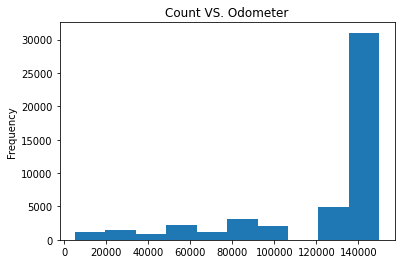

In [707]:
# Observe the distribution using value counts in percentage. 75% are over 125000 km. 
autos['odometer_km'].value_counts(normalize = True)*100
autos['odometer_km'].plot.hist(title = 'Count VS. Odometer')

<AxesSubplot:title={'center':'Count VS. Price'}, ylabel='Frequency'>

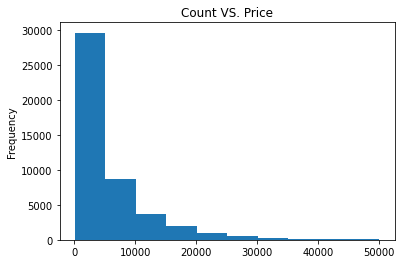

In [708]:
# observe the price frequency distribution. Eliminate the extreme outliers > $50,000
filt = (autos['price'] > 100) & (autos['price'] < 50000)
autos = autos.loc[filt]
autos['price'].plot.hist(title = 'Count VS. Price')

In [709]:
autos['price'].describe()

count    46032.000000
mean      5705.854536
std       6784.672235
min        110.000000
25%       1290.000000
50%       3150.000000
75%       7500.000000
max      49999.000000
Name: price, dtype: float64

In [710]:
print('The median auto price is ${:.0f}, and the mean is ${:.0f}'.format(autos['price'].describe()[5],autos['price'].describe()[1]))

The median auto price is $3150, and the mean is $5706


In [711]:
# create a list of odometer bins
autos.odometer_km.value_counts()
odo_bins = autos.odometer_km.value_counts().index

# create a dictionary with the average price per bin
mean_price_milage = {}

for odo in odo_bins:
    select_row = autos.loc[autos['odometer_km'] == odo]
    select_col= select_row['price']
    mean_price = select_col.mean()
    mean_price_milage[odo] = mean_price
mean_price_milage

{150000: 3762.544193700047,
 125000: 6092.827865448505,
 100000: 7801.989655172414,
 90000: 8241.74684305472,
 80000: 9592.133869787856,
 70000: 10736.449829931973,
 60000: 11418.336642599277,
 50000: 13065.026557711952,
 40000: 14158.692802056556,
 30000: 14608.035422343324,
 20000: 15280.181946403385,
 5000: 6090.694362017804,
 10000: 17575.01818181818}

In [712]:
# The second to last '5000', because it doesn't follow the trend of decreaseing price with increasing miles. 
# It's an outlier so I will delete it and rerun
autos.odometer_km.value_counts()
filt = ~(autos['odometer_km'] == 5000)
odo_bins = autos[filt].odometer_km.value_counts().index
odo_bins

Int64Index([150000, 125000, 100000,  90000,  80000,  70000,  60000,  50000,
             40000,  30000,  20000,  10000],
           dtype='int64')

In [713]:
mean_price_milage = {}

for odo in odo_bins:
    select_row = autos.loc[autos['odometer_km'] == odo]
    select_col= select_row['price']
    mean_price = select_col.mean()
    mean_price_milage[odo] = mean_price

In [714]:
# There is an obvious trend of decreasing price with increasing miles
mean_price_milage

{150000: 3762.544193700047,
 125000: 6092.827865448505,
 100000: 7801.989655172414,
 90000: 8241.74684305472,
 80000: 9592.133869787856,
 70000: 10736.449829931973,
 60000: 11418.336642599277,
 50000: 13065.026557711952,
 40000: 14158.692802056556,
 30000: 14608.035422343324,
 20000: 15280.181946403385,
 10000: 17575.01818181818}

## Mean Price and Mileage of the Most Common Brands

The table at the end of this section shows the 'mean_price' and the 'mileage' for the top 6 most common brands by count on eBay. The Audi was three times more expensive than the Opel with similar mileage. The Mercedes and BMW were both pretty similar in price and mileage (as were the Ford and Opel). The Volkswagen was in the middle of the group.

In [715]:
#Finding the the 6 most common brands by count
brand_counts = autos['brand'].value_counts().head(6).index
print('The most popular brands are {}'.format(brand_counts))

The most popular brands are Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'], dtype='object')


In [716]:
# Then created a dictionary to hold the average price for each
brand_mean_prices = {}
for brand in brand_counts:
    filt = autos['brand'] == brand
    auto_brand = autos[filt]
    mean_price = auto_brand['price'].mean()
    brand_mean_prices[brand] = int(mean_price)

print(brand_mean_prices)

{'volkswagen': 5440, 'bmw': 8145, 'opel': 3020, 'mercedes_benz': 8226, 'audi': 9076, 'ford': 3673}


In [717]:
# Sort the dictionary from highest to lowest average price. 
brand_mean_prices_sorted = sorted(brand_mean_prices.items(), key = lambda x: x[1], reverse = True)
print(brand_mean_prices_sorted)

[('audi', 9076), ('mercedes_benz', 8226), ('bmw', 8145), ('volkswagen', 5440), ('ford', 3673), ('opel', 3020)]


In [718]:
# Repeat for the mileage 
brand_mean_mileage = {}
for brand in brand_counts:
    filt = autos['brand'] == brand
    auto_brand = autos[filt]
    mean_mileage = auto_brand['odometer_km'].mean()
    brand_mean_mileage[brand] = int(mean_mileage)

print (brand_mean_mileage)

{'volkswagen': 128807, 'bmw': 132974, 'opel': 129375, 'mercedes_benz': 131581, 'audi': 129796, 'ford': 124382}


In [719]:
# Combine the data into a new dataframe and pretty printed it
top_6 = pd.DataFrame(data = [brand_mean_prices, brand_mean_mileage]).T
top_6 = top_6.reset_index()
top_6.columns = ['brand', 'mean_price', 'mileage']
top_6.columns = [x.upper() for x in top_6.columns]
top_6.set_index('BRAND').sort_values('MEAN_PRICE', ascending = False)

,MEAN_PRICE,MILEAGE
BRAND,,
audi,9076,129796
mercedes_benz,8226,131581
bmw,8145,132974
volkswagen,5440,128807
ford,3673,124382
opel,3020,129375


## The Most Common Brand/Model Combinations
The Volkswagen 'Golf' was the most commonly found brand/model combination on the eBay Kleinanzeigen, followed by Peugeot 'Andere', and the BMW '3er'. The complete list can be found at the end of this section.  

In [720]:
# create a list of models sorted from most to least common
autos['model'].value_counts()
models = autos['model'].value_counts().index

# loop through the list of models to create a dictionary with a brand/model pair
top_brand_model = {}
for model in models: 
    filt = autos['model'] == model
    select_brand = autos.loc[filt, 'brand'].iloc[0]
    if select_brand in top_brand_model:
        continue
    else: 
        top_brand_model[select_brand] = model
        
# Combine the data into a new dataframe and pretty printed it
common = pd.DataFrame(data = [top_brand_model]).T
common = common.reset_index()
common.columns = ['brand', 'model']
common.columns = [x.upper() for x in common.columns]
common = common.set_index('BRAND')
common.head(5)

,MODEL
BRAND,
volkswagen,golf
peugeot,andere
bmw,3er
opel,corsa
audi,a4


## Impact of Damage on Vehicle Price

The analysis showed that almost 12% of cars in the dataset had some sort of damage that had not been repaired. To find the impact of the damage on the price of the vehicle, two python dictionaries were created; one with model and price of damaged models, the other with model and price of undamaged models. A table was then created to show the difference in price and the percent decrease in value. The average decrease in value for all damaged models is 49.03%  

In [721]:
damage = autos['unrepaired_damage'].value_counts(normalize = True)*100
print('{:.2f}% of cars have some sort of unrepaired damage'.format(damage[1]))

11.67% of cars have some sort of unrepaired damage


In [722]:
# First, find average price of damaged models and create a dictionary
filt =  autos['unrepaired_damage'] == 'yes'
damaged = autos.loc[filt, ['model','price','unrepaired_damage']]
dam_mods = damaged['model'].unique()

ave_price_damaged = {}
for mods in dam_mods: 
    filt = damaged['model'] == mods
    select_row = damaged[filt]
    select_col = select_row['price'].mean()
    ave_price_damaged[mods] = select_col  

In [723]:
# Next, find the ave price of the undamaged model and create a dictionary
filt =  autos['unrepaired_damage'] == 'no'
no_damaged = autos.loc[filt, ['model','price','unrepaired_damage']]
no_dam_mods = no_damaged['model'].unique()

ave_price_no_damaged = {}
for mods in no_dam_mods: 
    filt = no_damaged['model'] == mods
    select_row = no_damaged[filt]
    select_col = select_row['price'].mean()
    ave_price_no_damaged[mods] = select_col

In [724]:
# Combine the two dictionaries into a separate df and pretty print
combined_damage = pd.DataFrame.from_dict([ave_price_no_damaged, ave_price_damaged]).T
combined_damage = combined_damage.rename(columns = {1: 'Ave Price Damaged', 0: 'Ave Price Undamaged'})
combined_damage.dropna(axis = 'index', how = 'any', inplace = True)
combined_damage['Ave Price Difference'] = combined_damage['Ave Price Undamaged'] - combined_damage['Ave Price Damaged']
combined_damage['Percent Decrease in Value'] = combined_damage['Ave Price Damaged']/combined_damage['Ave Price Undamaged']*100
combined_damage = combined_damage.round(decimals=0)
combined_damage.head()

,Ave Price Undamaged,Ave Price Damaged,Ave Price Difference,Percent Decrease in Value
andere,7431.0,2455.0,4976.0,33.0
7er,10414.0,5071.0,5343.0,49.0
golf,6111.0,1880.0,4231.0,31.0
fortwo,4012.0,1507.0,2505.0,38.0
focus,4094.0,1652.0,2442.0,40.0


In [725]:
# Find average % decrease in value for all damaged models
ave_per_dec = combined_damage['Percent Decrease in Value'].mean()
print('The average decrease in value for all damaged models is {:.2f}%'.format(ave_per_dec))

The average decrease in value for all damaged models is 49.03%


## Conclusion
EBay Kleinanzeigen is the German language version of eBay, where users buy and sell used cars on-line. A 50,000 row sample of the original 300,000 row dataset was provided for teaching purposes, so students could practice cleaning, wrangling, and analyzing data using Python and the Pandas library. 

Of the original 50,000 rows, 97% of the rows remained after cleaning the data. The 3% that were justifiably removed consisted of outliers and unrealistic dates in the registration year. For example, the data was acquired in 2016; so, any year beyond that was not possible. Likewise, dates earlier than 1920 were thrown out for obvious reasons. The Seller' and 'Offer Type' columns were dropped for having the same value through-out the entire series. Other wrangling tasks included re-formating column titles for consistency; removing non-numeric characters in the price and odometer_km column and changing the data type to integers; removing the time values from 'date_crawled','last_seen','ad_created'; and translating strings from German to English.

The vast majority of cars on the market were heavily used and inexpensive. Approximately 75% of all the cars on the eBay Kleinanzeigen dataset had at least 125,000 km on them (77,000 miles) with 64.8% over 150,000 km (93,000 miles). The median car price was \\$3,000, and the mean was \\$5,625. The data showed a strong, negative, linear correlation between mileage and price to support this assessment. 

The six most common brands were  The Volkswagen, BMW, Opel, Mercedes Benz', Audi, and Ford. The Mercedes and BMW were both pretty similar in price and mileage(as were the Ford and Opel, with the Volkswagen was in the middle). The Volkswagen 'Golf' was the most commonly found brand/model combination followed by the Peugeot 'Andere', and the BMW '3er'. 

Finally, almost 12% of cars had some sort of damage that had not been repaired at the time they were posted. This resulted in an average 49% lower listing price, compared to their undamaged counterparts. 49% was a general observation across all makes and models.  